# Lab | Inferential statistics
### Instructions
It is assumed that the mean systolic blood pressure is `μ = 120 mm Hg`. In the Honolulu Heart Study, a sample of `n = 100` people had an average systolic blood pressure of `130.1 mm Hg` with a standard deviation of `21.21 mm Hg`. Is the group significantly different (with respect to systolic blood pressure!) from the regular population?

    Set up the hypothesis test.
    Write down all the steps followed for setting up the test.
    Calculate the test statistic by hand and also code it in Python. It should be 4.76190. We will take a look at how to make decisions based on this calculated value.
    If you finished the previous question, please go through the code for principal_component_analysis_example provided in    the files_for_lab folder .

#### Steps followed for setting up the test
•	State the null and alternative hypotheses. 

     Null: The group from the sample is not signifficantly different from the regular population.
     Alternative: the group has a statistical difference from the general population.

•	Choose the level of significance for the test.

     We've chosen the level of significance as 0.05

•	Gather data about a sample or samples.

•	To determine whether the sample is highly unlikely under the assumption that the null hypothesis is true, construct the range of likely sample means or calculate the p-value.

In [1]:
import math
import numpy as np
sample_mean = 130.1
pop_mean = 120
sample_std = 21.21
n = 100
statistic = (sample_mean - pop_mean)/(sample_std/math.sqrt(n))
print("Statistic is: ", statistic)

Statistic is:  4.761904761904759


In [2]:
from scipy import stats
from numpy.random import normal


samples = {}

for i in range(10):
    sample_name = "sample_" + str(i)
    samples[sample_name] = normal(loc = 130.1, scale = 21.21, size = 100)
    sample_mean = "sample_" + str(i) + "_mean"
    samples[sample_mean] = np.mean(samples[sample_name])
    sample_std = "sample_" + str(i) + "_std"
    samples[sample_std] = np.std(samples[sample_name],ddof=1)
    sample_statistic = "sample_" + str(i) + "_t-statistic"
    samples[sample_statistic] = (samples[sample_mean]- pop_mean)/(samples[sample_std]/math.sqrt(n)) 
    print("The t-statistic for the sample {} is: {}".format(i,samples[sample_statistic]))

The t-statistic for the sample 0 is: 5.648938843213311
The t-statistic for the sample 1 is: 5.060703751418548
The t-statistic for the sample 2 is: 5.73432851054569
The t-statistic for the sample 3 is: 4.397382769323305
The t-statistic for the sample 4 is: 3.4408726051880434
The t-statistic for the sample 5 is: 5.8358045419657145
The t-statistic for the sample 6 is: 4.367904592132475
The t-statistic for the sample 7 is: 4.575939675784976
The t-statistic for the sample 8 is: 4.881283781308646
The t-statistic for the sample 9 is: 6.062654117964025


In [3]:
print("Assuming a significance level of 0.05")
print()

for i in range(10):
    sample_name = "sample_" + str(i)
    print("The p-value of sample {} is: {:-5.3}".format(i,stats.ttest_1samp(samples[sample_name],120)[1]))
    if ( stats.ttest_1samp(samples[sample_name],120)[1] < 0.05 ):
        print("Therefore we discard the null hypothesis Ho, as it's very unlikely to get sample {} given Ho.".format(i))
    print()

Assuming a significance level of 0.05

The p-value of sample 0 is: 1.55e-07
Therefore we discard the null hypothesis Ho, as it's very unlikely to get sample 0 given Ho.

The p-value of sample 1 is: 1.93e-06
Therefore we discard the null hypothesis Ho, as it's very unlikely to get sample 1 given Ho.

The p-value of sample 2 is: 1.06e-07
Therefore we discard the null hypothesis Ho, as it's very unlikely to get sample 2 given Ho.

The p-value of sample 3 is: 2.76e-05
Therefore we discard the null hypothesis Ho, as it's very unlikely to get sample 3 given Ho.

The p-value of sample 4 is: 0.00085
Therefore we discard the null hypothesis Ho, as it's very unlikely to get sample 4 given Ho.

The p-value of sample 5 is: 6.78e-08
Therefore we discard the null hypothesis Ho, as it's very unlikely to get sample 5 given Ho.

The p-value of sample 6 is: 3.09e-05
Therefore we discard the null hypothesis Ho, as it's very unlikely to get sample 6 given Ho.

The p-value of sample 7 is: 1.38e-05
Therefor

### The null hypothesis is rejected, so we can conclude that the sample group is significantly different from the regular population with respect to the systolic blood pressure.

## Principal component analysis example 

In [4]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 



In [5]:
breast_cancer = pd.read_csv('breast-cancer.csv', header=None)
breast_cancer.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [6]:
total_cols = ['id', 'outcome', 'time', 'cell_1_radius', 'cell_1_texture', 'cell_1_perimiter',
              'cell_1_area', 'cell_1_smoothness', 'cell_1_compactness', 'cell_1_concavity',
              'cell_1_concave_points', 'cell_1_symmetry', 'cell_1_fractal_dimension',
              'cell_2_radius', 'cell_2_texture', 'cell_2_perimiter', 'cell_2_area',
              'cell_2_smoothness', 'cell_2_compactness', 'cell_2_concavity',
              'cell_2_concave_points', 'cell_2_symmetry', 'cell_2_fractal_dimension', 'cell_3_radius', 
              'cell_3_texture', 'cell_3_perimiter', 'cell_3_area', 'cell_3_smoothness',
              'cell_3_compactness', 'cell_3_concavity', 'cell_3_concave_points', 'cell_3_symmetry',
              'cell_3_fractal_dimension', 'tumor_size', 'lymph_status']
breast_cancer.columns = total_cols

In [7]:
breast_cancer.head(5)

,id,outcome,time,cell_1_radius,cell_1_texture,cell_1_perimiter,cell_1_area,cell_1_smoothness,cell_1_compactness,cell_1_concavity,...,cell_3_perimiter,cell_3_area,cell_3_smoothness,cell_3_compactness,cell_3_concavity,cell_3_concave_points,cell_3_symmetry,cell_3_fractal_dimension,tumor_size,lymph_status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [8]:
# breast_cancer.dtypes

In [9]:
numerics = breast_cancer._get_numeric_data()

In [10]:
numerics.head(5)

,id,time,cell_1_radius,cell_1_texture,cell_1_perimiter,cell_1_area,cell_1_smoothness,cell_1_compactness,cell_1_concavity,cell_1_concave_points,...,cell_3_texture,cell_3_perimiter,cell_3_area,cell_3_smoothness,cell_3_compactness,cell_3_concavity,cell_3_concave_points,cell_3_symmetry,cell_3_fractal_dimension,tumor_size
0,119513,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,...,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0
1,8423,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0
2,842517,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,...,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5
3,843483,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0
4,843584,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5


In [11]:
numerics = numerics.drop(['id','time'], axis=1)

Before we apply PCA we need to standardize/scale the data. For this we can use sklearn's preprocessing library 


In [12]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(numerics)
scaled = transformer.transform(numerics)
scaled = pd.DataFrame(scaled)
scaled.columns = numerics.columns 
scaled.head()

,cell_1_radius,cell_1_texture,cell_1_perimiter,cell_1_area,cell_1_smoothness,cell_1_compactness,cell_1_concavity,cell_1_concave_points,cell_1_symmetry,cell_1_fractal_dimension,...,cell_3_texture,cell_3_perimiter,cell_3_area,cell_3_smoothness,cell_3_compactness,cell_3_concavity,cell_3_concave_points,cell_3_symmetry,cell_3_fractal_dimension,tumor_size
0,0.192688,1.241770,0.123934,0.122300,-0.623774,-0.784542,-0.676803,-0.480176,-0.228521,0.086480,...,1.156324,-0.022477,0.053105,-1.112648,-1.054732,-0.708404,-1.370815,-0.743009,-0.459226,1.113530
1,0.183175,-2.774630,0.372418,0.088138,1.258416,2.711439,2.043606,1.785222,1.795777,2.216313,...,-2.133937,1.535510,1.050496,0.832831,1.837343,1.589132,1.922113,1.823321,1.329259,0.078903
2,1.254939,-1.127953,1.061610,1.147186,-1.146560,-0.477137,-0.436726,-0.147247,1.481536,-0.360812,...,-1.525864,0.650684,0.930741,-1.144541,-0.123520,-0.550192,0.541923,1.467183,-0.007488,-0.179753
3,-1.900104,-0.442226,-1.747667,-1.662423,3.187841,2.838018,1.209726,0.545246,2.446183,4.810056,...,-0.606256,-1.439240,-1.432374,3.001561,3.064487,1.444778,1.746815,4.540377,3.891002,-0.438410
4,0.912482,-1.850998,0.949089,0.930821,-0.190654,-0.197860,0.593194,0.518612,-0.433143,-0.536682,...,-2.243890,0.411261,0.290905,-0.297096,-0.978914,-0.211827,-0.361191,-1.160505,-0.665207,0.337560


In [13]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
pca = PCA()
pca.fit(scaled)

PCA()

In [14]:
# pca.components_

In [15]:
# variations = pca.explained_variance_
variations = pca.explained_variance_ratio_*100
variations = np.round(variations, decimals=1)
variations

array([31.6, 26.5, 10.8,  7.2,  4.6,  4. ,  3.2,  2.9,  1.9,  1.5,  1.2,
        1.1,  0.8,  0.7,  0.4,  0.3,  0.3,  0.2,  0.2,  0.2,  0.1,  0.1,
        0.1,  0.1,  0.1,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [16]:
plot_labels = ['PC'+str(i) for i in range(1,len(variations)+1)]
?plot_labels

Text(0.5, 1.0, 'PCA Scree Plot')

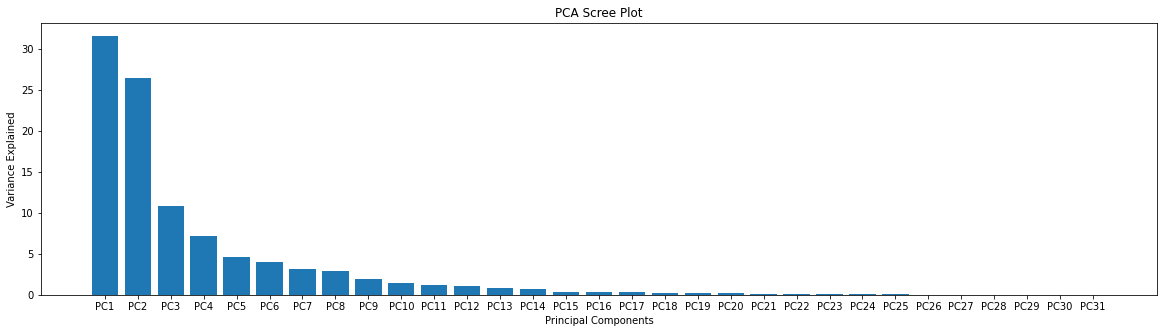

In [17]:
from matplotlib.pyplot import figure
figure(figsize=(20,5))
plt.bar(x = plot_labels, height=variations)
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('PCA Scree Plot')

In [18]:
data = pd.DataFrame(pca.components_)
data = data[[0,1,2]]
data.columns = ['PC1', 'PC2', 'PC3']
data.head()

,PC1,PC2,PC3
0,0.212947,0.017315,0.229033
1,-0.235699,-0.058704,-0.217823
2,-0.085063,0.063490,-0.085697
3,0.012836,0.601037,0.017419
4,0.049309,0.119550,0.037690
